## Load and Explore MNIST Dataset

### Subtask:
Load the MNIST dataset using Keras. Explore its structure, visualize a few sample images, and plot pixel intensity distributions to understand the data characteristics.


In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras import layers

# 1. Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()




11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
# 2. Print the shapes of the training and testing data and their labels
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")


Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)



Sample MNIST images:


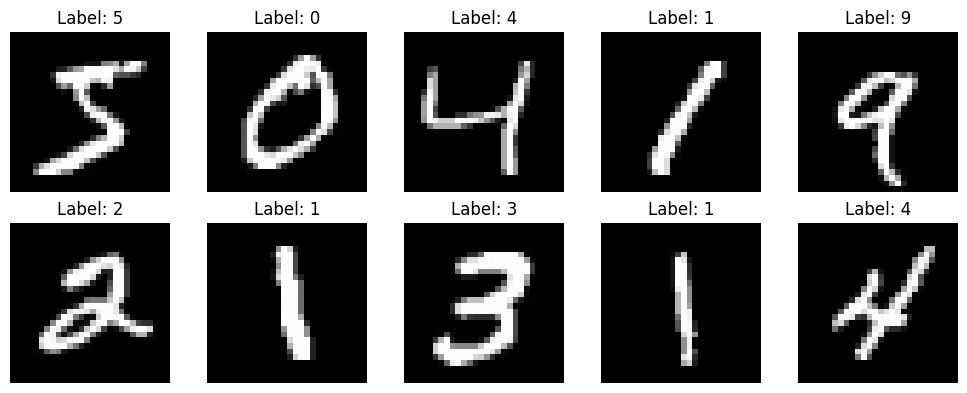

In [3]:

# 3. Display several sample images from the training dataset
print("\nSample MNIST images:")
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()



Pixel intensity distribution:


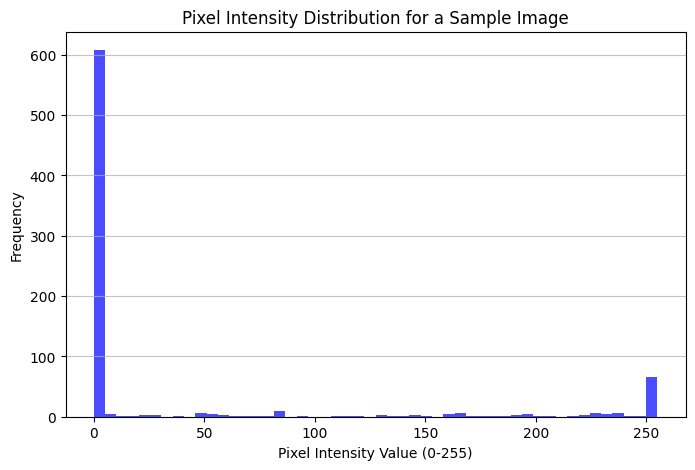

In [4]:
# 4. Create a histogram of pixel intensity values
print("\nPixel intensity distribution:")
plt.figure(figsize=(8, 5))
plt.hist(x_train[1].flatten(), bins=50, color='blue', alpha=0.7)
plt.title('Pixel Intensity Distribution for a Sample Image')
plt.xlabel('Pixel Intensity Value (0-255)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

## Build and Compile CNN Model

### Subtask:
Build a Convolutional Neural Network (CNN) model with two convolutional layers, ReLU activation functions, and max pooling layers. Compile the model with an appropriate optimizer and loss function.


In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# 1. Normalize the pixel values
x_train_norm = x_train.astype('float32') / 255.0
x_test_norm = x_test.astype('float32') / 255.0

# 2. Reshape the images to include a channel dimension
x_train_reshaped = x_train_norm.reshape(x_train_norm.shape[0], 28, 28, 1)
x_test_reshaped = x_test_norm.reshape(x_test_norm.shape[0], 28, 28, 1)

# 3. Convert integer labels to one-hot encoded vectors
y_train_one_hot = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes=10)



In [33]:
cnn_model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu',  input_shape=(28, 28, 1)),#32
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),#5*5*64 -> 1600 (vector)
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn_model.summary()

cnn_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

**Reasoning**:
The previous step successfully built and compiled the CNN model. Now, I will proceed to train the model using the prepared training data and validate it with the testing data, storing the training history.



In [7]:
history_cnn = cnn_model.fit(x_train_reshaped, y_train_one_hot,
                          epochs=10,
                          batch_size=128,
                          validation_data=(x_test_reshaped, y_test_one_hot))

print("CNN model training complete.")

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 46s 94ms/step - accuracy: 0.8572 - loss: 0.4919 - val_accuracy: 0.9825 - val_loss: 0.0586
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 90ms/step - accuracy: 0.9816 - loss: 0.0616 - val_accuracy: 0.9868 - val_loss: 0.0395
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 91ms/step - accuracy: 0.9878 - loss: 0.0397 - val_accuracy: 0.9869 - val_loss: 0.0394
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 91ms/step - accuracy: 0.9911 - loss: 0.0302 - val_accuracy: 0.9892 - val_loss: 0.0326
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 88ms/step - accuracy: 0.9937 - loss: 0.0212 - val_accuracy: 0.9876 - val_loss: 0.0369
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 89ms/step - accuracy: 0.9947 - loss: 0.0159 - val_accuracy: 0.9894 - val_loss: 0.0294
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 90ms/step - accuracy: 0.9952 - loss: 0.0138 - val_accuracy: 0.9901 - val_loss: 0.0303
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 43s 92ms/step - accuracy: 0.9961 - loss: 0.0109 - 

## Evaluate CNN Model

### Subtask:
Evaluate the performance of the trained CNN model on the test dataset and print the test loss and accuracy.


In [8]:
print("\nEvaluating CNN model on the test dataset...")
loss, accuracy = cnn_model.evaluate(x_test_reshaped, y_test_one_hot, verbose=0)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


Evaluating CNN model on the test dataset...
Test Loss: 0.0294
Test Accuracy: 0.9919


## Build and Compile Fully Connected Network (FCN)

### Subtask:
Build a Fully Connected Network (FCN) model with appropriate dense layers for the MNIST dataset. Compile the model with an optimizer and loss function.


In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Input

# 2. Define a Sequential FCN model.
fcn_model = Sequential([
    Input(shape=(28, 28, 1)), # Explicitly define the input layer
    # 3. Add a Flatten layer as the first layer
    Flatten(), # No need to pass input_shape here anymore
    # 4. Add several Dense layers with relu activation functions
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    # 5. Add a final Dense layer with 10 units and a softmax activation function
    Dense(10, activation='softmax')
])

# 6. Print the model summary
fcn_model.summary()

# 7. Compile the FCN model
fcn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

## Train FCN Model

### Subtask:
Train the FCN model using the preprocessed training data and evaluate it with the preprocessed testing data. Store the training history.

The FCN model is now built and compiled. I will train the `fcn_model` using the `x_train_reshaped` and `y_train_one_hot` data for a specified number of epochs and a batch size. The `validation_data` will be set to `(x_test_reshaped, y_test_one_hot)` to monitor performance on the test set during training. The training history will be saved in a variable called `history_fcn` for future plotting and analysis.

In [10]:
history_fcn = fcn_model.fit(x_train_reshaped, y_train_one_hot,
                          epochs=10,
                          batch_size=128,
                          validation_data=(x_test_reshaped, y_test_one_hot))

print("FCN model training complete.")

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8588 - loss: 0.4960 - val_accuracy: 0.9619 - val_loss: 0.1294
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9659 - loss: 0.1134 - val_accuracy: 0.9664 - val_loss: 0.1011
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9801 - loss: 0.0654 - val_accuracy: 0.9753 - val_loss: 0.0813
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9860 - loss: 0.0461 - val_accuracy: 0.9764 - val_loss: 0.0754
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9894 - loss: 0.0364 - val_accuracy: 0.9762 - val_loss: 0.0757
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9916 - loss: 0.0267 - val_accuracy: 0.9730 - val_loss: 0.0876
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9935 - loss: 0.0216 - val_accuracy: 0.9775 - val_loss: 0.0793
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9955 - loss: 0.0152 - val_accuracy: 0.

The FCN model has been trained. The next step is to evaluate its performance on the test dataset, similar to the CNN model, and report the test loss and accuracy.



In [11]:
print("\nEvaluating FCN model on the test dataset...")
loss_fcn, accuracy_fcn = fcn_model.evaluate(x_test_reshaped, y_test_one_hot, verbose=0)

print(f"FCN Test Loss: {loss_fcn:.4f}")
print(f"FCN Test Accuracy: {accuracy_fcn:.4f}")


Evaluating FCN model on the test dataset...
FCN Test Loss: 0.0874
FCN Test Accuracy: 0.9769


## Compare CNN and FCN Model Performance

### Subtask:
Compare the performance of the trained CNN and FCN models based on their test accuracy and loss. Provide insights into why one might perform better than the other for image classification tasks like MNIST.

we will now analyze the training history of both the CNN and FCN models to compare their performance. This involves looking at the final test accuracy and loss for each model, and then discussing the inherent advantages of CNNs over FCNs for image data, such as their ability to capture spatial hierarchies and features through convolutional and pooling layers. I'll also consider the training efficiency and potential for overfitting for both models.

In [12]:
print("\n--- Model Performance Comparison ---")
print(f"CNN Model   -> Test Accuracy: {accuracy:.4f}, Test Loss: {loss:.4f}")
print(f"FCN Model   -> Test Accuracy: {accuracy_fcn:.4f}, Test Loss: {loss_fcn:.4f}")


--- Model Performance Comparison ---
CNN Model   -> Test Accuracy: 0.9919, Test Loss: 0.0294
FCN Model   -> Test Accuracy: 0.9769, Test Loss: 0.0874


### Summary of CNN vs. FCN Performance:
This outcome is expected for image classification tasks due to the fundamental differences in how CNNs and FCNs process spatial data:

1.  **Spatial Feature Extraction**: CNNs are designed to automatically and adaptively learn spatial hierarchies of features through their convolutional layers. The convolutional filters can detect local patterns such as edges, textures, and shapes, which are crucial for recognizing images. FCNs, on the other hand, flatten the image input into a 1D vector, losing all spatial information and treating each pixel as an independent feature.

2.  **Parameter Sharing**: CNNs employ parameter sharing, where the same filter is applied across different locations of the image. This significantly reduces the number of parameters in the model, making it more efficient and less prone to overfitting compared to FCNs, especially when dealing with high-dimensional image data.

3.  **Pooling Layers**: Max pooling layers in CNNs help to reduce the spatial dimensions of the feature maps, making the representations more robust to small translations and distortions in the input image. FCNs lack this mechanism, making them more sensitive to the exact position of features.

4.  **Hierarchical Feature Learning**: The stacked convolutional and pooling layers allow CNNs to learn increasingly complex and abstract features. Early layers might detect simple edges, while deeper layers combine these to form parts of objects, eventually leading to full object recognition. FCNs typically learn features in a less structured, more global manner.

In conclusion, the CNN's architecture is inherently better suited for image data due to its ability to preserve and exploit spatial relationships, leading to more effective feature learning and better overall classification performance on datasets like MNIST.

In [13]:
print("\n--- Model Performance Comparison ---")
print(f"CNN Model   -> Test Accuracy: {accuracy:.4f}, Test Loss: {loss:.4f}")
print(f"FCN Model   -> Test Accuracy: {accuracy_fcn:.4f}, Test Loss: {loss_fcn:.4f}")


--- Model Performance Comparison ---
CNN Model   -> Test Accuracy: 0.9919, Test Loss: 0.0294
FCN Model   -> Test Accuracy: 0.9769, Test Loss: 0.0874


## Build and Compile CNN with Dropout

### Subtask:
Create a new CNN model based on the previous architecture, adding dropout layers to mitigate overfitting. Compile the model with an appropriate optimizer and loss function.


In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# 1. Define a new Sequential CNN model with dropout
cnn_dropout_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    # 2. Add dropout layer after the first pooling layer
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    # 2. Add dropout layer after the second pooling layer
    Dropout(0.25),

    # 3. Add a Flatten layer
    Flatten(),

    # 4. Add a Dense hidden layer with ReLU activation, and a dropout layer after it
    Dense(128, activation='relu'),
    Dropout(0.5),

    # 5. Add a final Dense output layer with 10 units and a softmax activation function
    Dense(10, activation='softmax')
])

# 6. Print the model summary to review its architecture
cnn_dropout_model.summary()

# 7. Compile the new CNN model
cnn_dropout_model.compile(optimizer='adam',
                          loss='categorical_crossentropy',
                          metrics=['accuracy'])

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Now, we will train this model using the prepared training data and validate it with the testing data, storing the training history for later analysis.



In [15]:
history_cnn_dropout = cnn_dropout_model.fit(x_train_reshaped, y_train_one_hot,
                                      epochs=10,
                                      batch_size=128,
                                      validation_data=(x_test_reshaped, y_test_one_hot))

print("CNN model with Dropout training complete.")

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 49s 99ms/step - accuracy: 0.7594 - loss: 0.7333 - val_accuracy: 0.9757 - val_loss: 0.0766
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 99ms/step - accuracy: 0.9590 - loss: 0.1408 - val_accuracy: 0.9858 - val_loss: 0.0461
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 46s 99ms/step - accuracy: 0.9701 - loss: 0.0988 - val_accuracy: 0.9873 - val_loss: 0.0378
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 96ms/step - accuracy: 0.9762 - loss: 0.0828 - val_accuracy: 0.9880 - val_loss: 0.0347
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 99ms/step - accuracy: 0.9787 - loss: 0.0693 - val_accuracy: 0.9887 - val_loss: 0.0307
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 46s 99ms/step - accuracy: 0.9791 - loss: 0.0662 - val_accuracy: 0.9902 - val_loss: 0.0283
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 46s 98ms/step - accuracy: 0.9835 - loss: 0.0566 - val_accuracy: 0.9907 - val_loss: 0.0249
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 96ms/step - accuracy: 0.9840 - loss: 0.0529 - 

In [16]:
print("\nEvaluating Dropout CNN model on the test dataset...")
loss, accuracy = cnn_dropout_model.evaluate(x_test_reshaped, y_test_one_hot, verbose=0)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


Evaluating Dropout CNN model on the test dataset...
Test Loss: 0.0254
Test Accuracy: 0.9918


# Task
Build a Convolutional Neural Network (CNN) model that incorporates both Batch Normalization and Dropout layers, following the previous CNN architecture. Compile this model using the Adam optimizer, 'categorical_crossentropy' loss, and 'accuracy' metrics.

## Build and Compile CNN with Batch Normalization and Dropout

### Subtask:
Create a new Convolutional Neural Network model incorporating both Batch Normalization layers and Dropout layers, based on the previous CNN architecture. Compile this model using the Adam optimizer, 'categorical_crossentropy' loss, and 'accuracy' metrics.


In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input

# 2. Define a new Sequential CNN model with Batch Normalization and Dropout
cnn_bn_dropout_model = Sequential([
    Input(shape=(28, 28, 1)), # Explicitly define the input layer
    # 3. Add a Conv2D layer with 32 filters, (3,3) kernel, 'same' padding, 'relu' activation
    Conv2D(32, (3, 3), padding='same', activation='relu'),
    # 4. Add a BatchNormalization layer
    BatchNormalization(),
    # 5. Add a MaxPooling2D layer with a (2,2) pool size
    MaxPooling2D((2, 2)),
    # 6. Add a Dropout layer with a rate of 0.25
    Dropout(0.25),

    # 7. Add another Conv2D layer with 64 filters, (3,3) kernel, 'same' padding, and 'relu' activation
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    # 8. Add a BatchNormalization layer
    BatchNormalization(),
    # 9. Add another MaxPooling2D layer with a (2,2) pool size
    MaxPooling2D((2, 2)),
    # 10. Add another Dropout layer with a rate of 0.25
    Dropout(0.25),

    # 11. Add a Flatten layer
    Flatten(),

    # 12. Add a Dense layer with 128 units and 'relu' activation
    Dense(128, activation='relu'),
    # 13. Add another Dropout layer with a rate of 0.5
    Dropout(0.5),

    # 14. Add a final Dense output layer with 10 units and 'softmax' activation
    Dense(10, activation='softmax')
])

# 15. Print the model summary to review its architecture
cnn_bn_dropout_model.summary()

# 16. Compile the model
cnn_bn_dropout_model.compile(optimizer='adam', #sgd, adam, RMSProp
                              loss='categorical_crossentropy',
                              metrics=['accuracy'])

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 422,026 (1.61 MB)

 Trainable params: 421,834 (1.61 MB)

 Non-trainable params: 192 (768.00 B)

The CNN model with Batch Normalization and Dropout layers has been successfully built and compiled. Now, we will proceed to train this model using the prepared training data and validate it with the testing data, storing the training history for later analysis.



In [18]:
history_cnn_bn_dropout = cnn_bn_dropout_model.fit(x_train_reshaped, y_train_one_hot,
                                      epochs=10,
                                      batch_size=128,
                                      validation_data=(x_test_reshaped, y_test_one_hot))

print("CNN model with Batch Normalization and Dropout training complete.")

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 96s 200ms/step - accuracy: 0.7724 - loss: 0.7833 - val_accuracy: 0.9481 - val_loss: 0.1555
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 96s 205ms/step - accuracy: 0.9527 - loss: 0.1612 - val_accuracy: 0.9843 - val_loss: 0.0493
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 141s 204ms/step - accuracy: 0.9668 - loss: 0.1104 - val_accuracy: 0.9815 - val_loss: 0.0597
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 95s 202ms/step - accuracy: 0.9729 - loss: 0.0957 - val_accuracy: 0.9891 - val_loss: 0.0370
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 94s 200ms/step - accuracy: 0.9757 - loss: 0.0793 - val_accuracy: 0.9890 - val_loss: 0.0365
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 93s 199ms/step - accuracy: 0.9781 - loss: 0.0718 - val_accuracy: 0.9882 - val_loss: 0.0428
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 141s 198ms/step - accuracy: 0.9797 - loss: 0.0680 - val_accuracy: 0.9913 - val_loss: 0.0319
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 145s 206ms/step - accuracy: 0.9823 - loss

In [19]:
print("\nEvaluating Batch Normalization and Dropout CNN model on the test dataset...")
loss, accuracy = cnn_bn_dropout_model.evaluate(x_test_reshaped, y_test_one_hot, verbose=0)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


Evaluating Batch Normalization and Dropout CNN model on the test dataset...
Test Loss: 0.0259
Test Accuracy: 0.9918


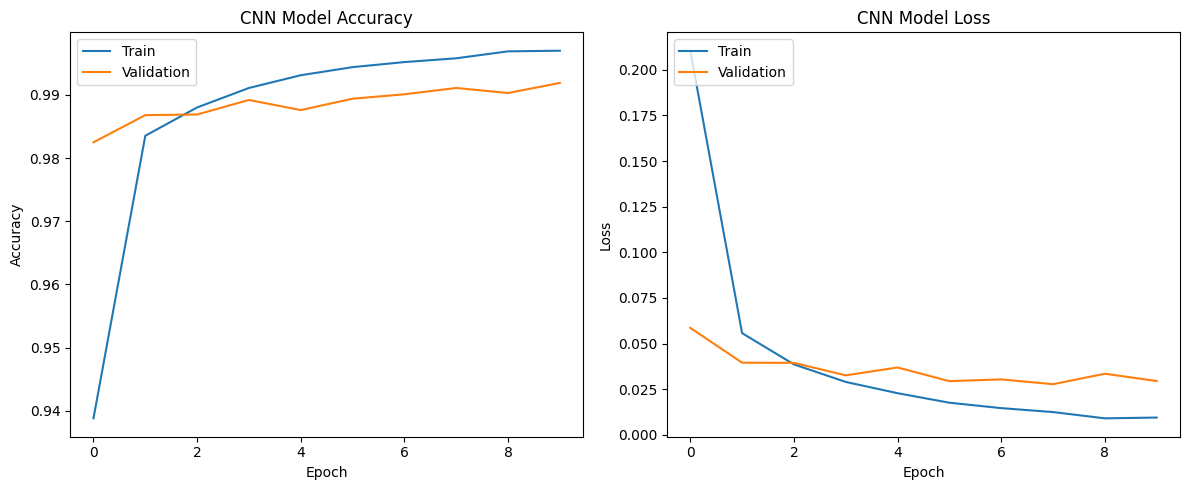

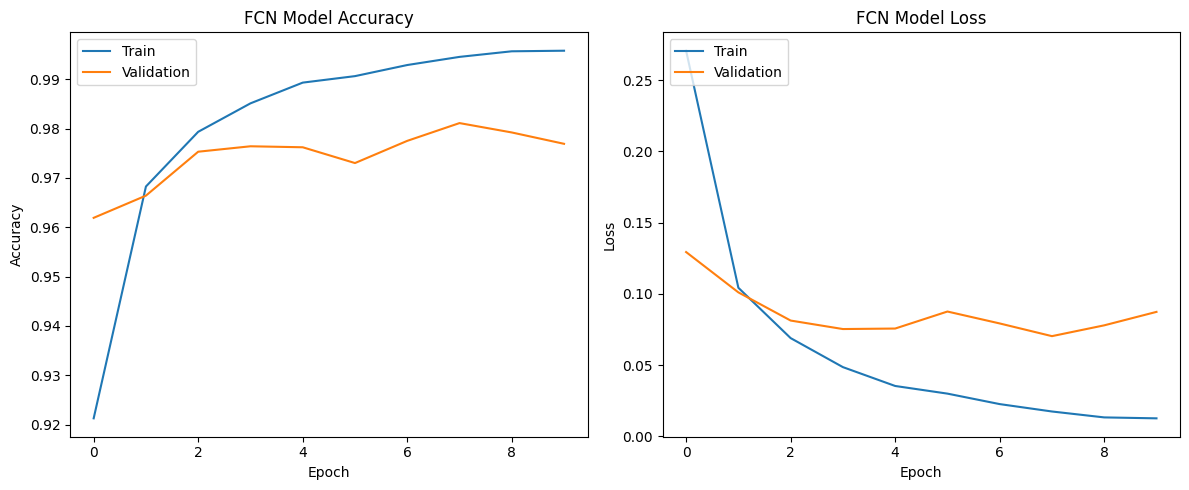

In [37]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values for CNN
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])
plt.title('CNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values for CNN
plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.title('CNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.show()

# Plot training & validation accuracy values for FCN
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_fcn.history['accuracy'])
plt.plot(history_fcn.history['val_accuracy'])
plt.title('FCN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values for FCN
plt.subplot(1, 2, 2)
plt.plot(history_fcn.history['loss'])
plt.plot(history_fcn.history['val_loss'])
plt.title('FCN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.show()

# Task
Select the `cnn_bn_dropout_model` as the best-performing CNN model and choose a sample image from `x_test_reshaped` to visualize its feature maps.

## Select Model and Input Image

### Subtask:
Identify the `cnn_bn_dropout_model` as the best-performing CNN model and select a sample image from `x_test_reshaped` to use for feature map visualization.


Selected model for visualization: sequential_3
Selected sample image index: 0


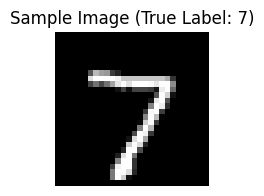

In [20]:
import matplotlib.pyplot as plt

# 1. Identify the cnn_bn_dropout_model as the best-performing CNN model
model_for_visualization = cnn_bn_dropout_model

# 2. Choose a sample image from the x_test_reshaped dataset
sample_image_index = 0
sample_image = x_test_reshaped[sample_image_index]
sample_label = y_test[sample_image_index] # Get the true label for context

print(f"Selected model for visualization: {model_for_visualization.name}")
print(f"Selected sample image index: {sample_image_index}")

# 3. Display the selected sample image
plt.figure(figsize=(2, 2))
plt.imshow(sample_image.reshape(28, 28), cmap='gray')
plt.title(f"Sample Image (True Label: {sample_label})")
plt.axis('off')
plt.show()


## Create Intermediate Model for Feature Extraction

### Subtask:
Build a new Keras model that takes an input image and outputs the activations of the first Conv2D layer from the `cnn_bn_dropout_model`.


In [38]:
from tensorflow.keras.models import Model

# 1. Identify the input layer of the model_for_visualization (cnn_bn_dropout_model)
input_layer = model_for_visualization.inputs

# 2. Locate the first Conv2D layer within the model_for_visualization
# Iterate through layers to find the first Conv2D layer
first_conv_layer_output = None
for layer in model_for_visualization.layers:
    if isinstance(layer, Conv2D):
        first_conv_layer_output = layer.output
        print(f"Found first Conv2D layer: {layer.name}")
        break

if first_conv_layer_output is None:
    raise ValueError("No Conv2D layer found in the model.")

# 3. Create a new Keras Model for feature extraction
first_conv_layer_model = Model(inputs=input_layer, outputs=first_conv_layer_output)

print("Intermediate model for first Conv2D layer created.")
first_conv_layer_model.summary()

Found first Conv2D layer: conv2d_4
Intermediate model for first Conv2D layer created.


Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 320 (1.25 KB)

 Trainable params: 320 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

## Visualize First Conv2D Layer Feature Maps

### Subtask:
Use the `first_conv_layer_model` to predict the feature maps for the `sample_image` and visualize them. Interpret what these early-layer filters might be learning.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Visualizing 32 feature maps from the first Conv2D layer.


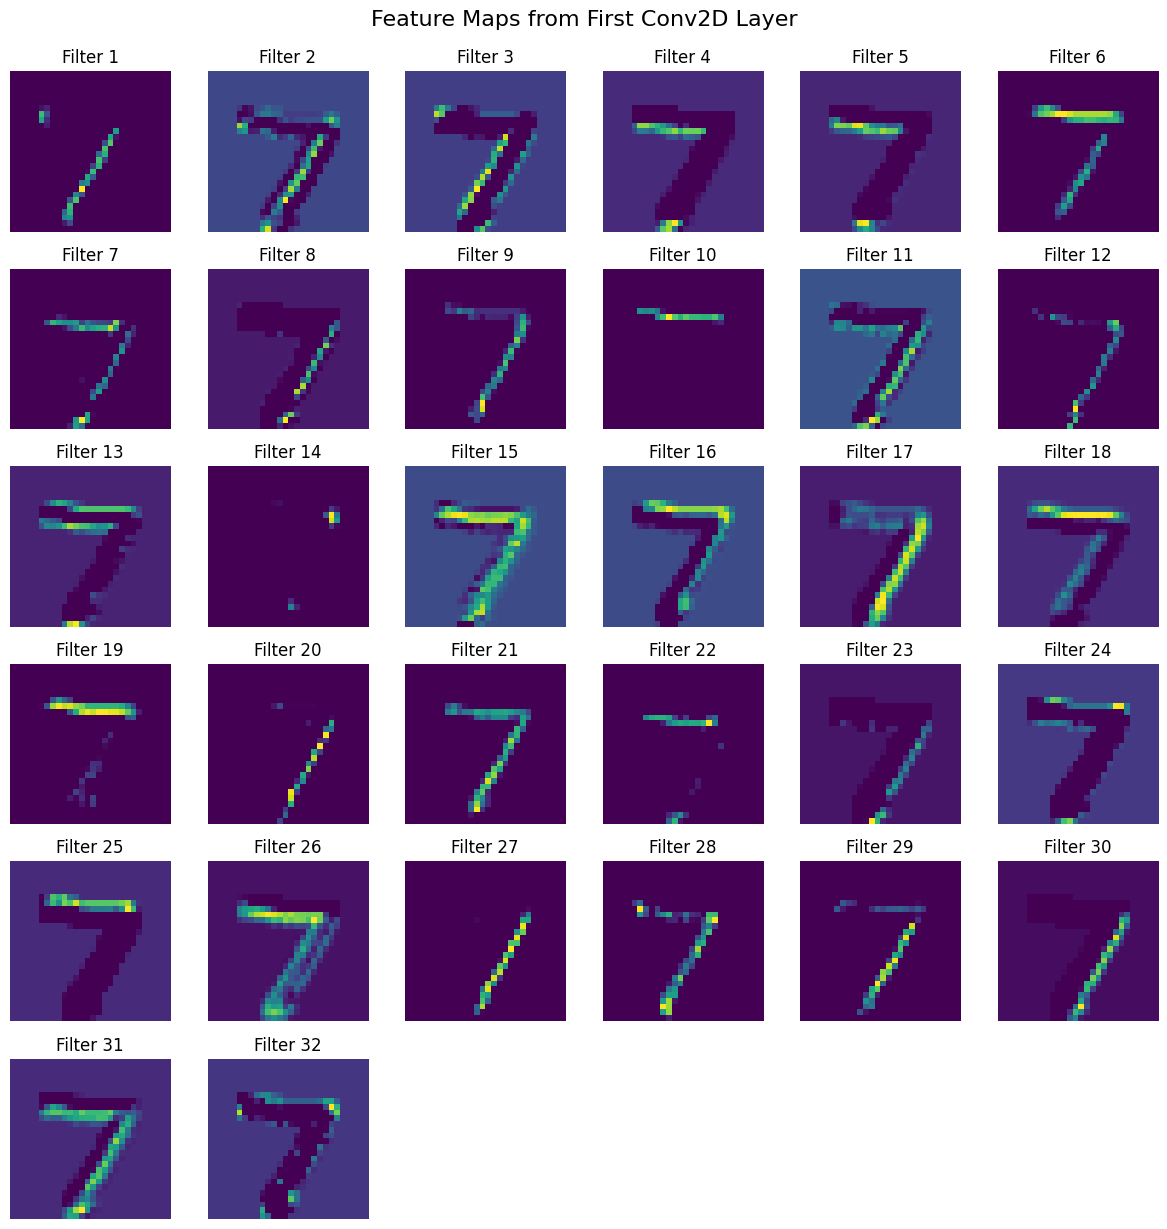

In [22]:
import numpy as np

# 1. Predict the feature maps for the sample image
# The model expects a batch of images, so expand the dimension of the sample image
feature_maps = first_conv_layer_model.predict(np.expand_dims(sample_image, axis=0))

# Remove the batch dimension for visualization
feature_maps = feature_maps[0]

# 2. Get the number of filters in the first Conv2D layer
num_filters = feature_maps.shape[-1]

# Determine the number of rows and columns for the subplot grid
# Aim for a nearly square grid
num_cols = int(np.ceil(np.sqrt(num_filters)))
num_rows = int(np.ceil(num_filters / num_cols))

print(f"Visualizing {num_filters} feature maps from the first Conv2D layer.")

# 3. Visualize each feature map
plt.figure(figsize=(num_cols * 2, num_rows * 2))
for i in range(num_filters):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(feature_maps[:, :, i], cmap='viridis') # Using viridis for better contrast
    plt.title(f'Filter {i+1}')
    plt.axis('off')
plt.tight_layout()
plt.suptitle('Feature Maps from First Conv2D Layer', y=1.02, fontsize=16)
plt.show()


### Interpretation of First Conv2D Layer Feature Maps:

The visualization of the feature maps from the first convolutional layer (`Conv2D`) reveals how the model initially processes the input image. These early layers typically learn very basic, low-level features:

*   **Edge Detection**: Many filters appear to highlight edges in various orientations (horizontal, vertical, diagonal). Some might respond strongly to light-to-dark transitions, while others respond to dark-to-light transitions.
*   **Texture Recognition**: Some feature maps might show patterns indicating simple textures or gradients within the digits.
*   **Corner and Blob Detection**: A few filters might be sensitive to specific corners or small blobs of pixels, which are fundamental components of handwritten digits.
*   **Varied Responses**: Different filters show distinct patterns, meaning each filter is designed (through training) to activate for a particular type of visual input feature. This diversity allows the network to build a rich representation of the image.

In essence, these early-layer filters act as fundamental building blocks, breaking down the complex input image into simpler, more abstract components. These basic features will then be combined by subsequent layers to form more complex patterns and ultimately lead to digit recognition.

# Task
Build and compile a new CNN model named `cnn_bn_dropout_model_sgd` with Batch Normalization and Dropout layers, using the same architecture as the previous `cnn_bn_dropout_model`, but compile it with the SGD optimizer with a learning rate of 0.01 and momentum of 0.9, 'categorical_crossentropy' loss, and 'accuracy' metrics.

## Build and Compile CNN with Batch Normalization and Dropout (SGD Optimizer)

### Subtask:
Create a new CNN model based on the `cnn_bn_dropout_model` architecture, but compile it using the SGD optimizer with appropriate parameters.


In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import SGD

# 1. Define a new Sequential CNN model named cnn_bn_dropout_model_sgd
cnn_bn_dropout_model_sgd = Sequential([
    Input(shape=(28, 28, 1)), # Explicitly define the input layer
    Conv2D(32, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(10, activation='softmax')
])

# 2. Instantiate an SGD optimizer with a learning rate of 0.01 and momentum of 0.9
sgd_optimizer = SGD(learning_rate=0.01, momentum=0.9)

# 3. Compile the cnn_bn_dropout_model_sgd model
cnn_bn_dropout_model_sgd.compile(optimizer=sgd_optimizer,
                                   loss='categorical_crossentropy',
                                   metrics=['accuracy'])

# 4. Print the model summary to review its architecture
cnn_bn_dropout_model_sgd.summary()


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 422,026 (1.61 MB)

 Trainable params: 421,834 (1.61 MB)

 Non-trainable params: 192 (768.00 B)

In [24]:
history_cnn_bn_dropout_sgd = cnn_bn_dropout_model_sgd.fit(x_train_reshaped, y_train_one_hot,
                                              epochs=10,
                                              batch_size=128,
                                              validation_data=(x_test_reshaped, y_test_one_hot))

print("CNN model with Batch Normalization, Dropout, and SGD Optimizer training complete.")

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 96s 201ms/step - accuracy: 0.7768 - loss: 0.7526 - val_accuracy: 0.9645 - val_loss: 0.1079
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 93s 199ms/step - accuracy: 0.9446 - loss: 0.1785 - val_accuracy: 0.9849 - val_loss: 0.0464
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 95s 202ms/step - accuracy: 0.9564 - loss: 0.1411 - val_accuracy: 0.9859 - val_loss: 0.0469
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 93s 199ms/step - accuracy: 0.9654 - loss: 0.1158 - val_accuracy: 0.9856 - val_loss: 0.0441
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 143s 202ms/step - accuracy: 0.9700 - loss: 0.1005 - val_accuracy: 0.9877 - val_loss: 0.0366
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 94s 200ms/step - accuracy: 0.9730 - loss: 0.0895 - val_accuracy: 0.9883 - val_loss: 0.0365
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 144s 205ms/step - accuracy: 0.9738 - loss: 0.0869 - val_accuracy: 0.9823 - val_loss: 0.0561
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 140s 200ms/step - accuracy: 0.9764 - loss

In [25]:
print("\nEvaluating CNN model with Batch Normalization, Dropout, and SGD Optimizer on the test dataset...")
loss, accuracy = cnn_bn_dropout_model_sgd.evaluate(x_test_reshaped, y_test_one_hot, verbose=0)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


Evaluating CNN model with Batch Normalization, Dropout, and SGD Optimizer on the test dataset...
Test Loss: 0.0280
Test Accuracy: 0.9918


# Task
Build a new CNN model named `cnn_bn_dropout_model_rmsprop` with Batch Normalization and Dropout layers, using the same architecture as the `cnn_bn_dropout_model`. Compile this model with the RMSProp optimizer, 'categorical_crossentropy' loss, and 'accuracy' metrics.

## Build and Compile CNN with RMSProp Optimizer

### Subtask:
Create a new CNN model named `cnn_bn_dropout_model_rmsprop` based on the `cnn_bn_dropout_model` architecture, but compile it using the RMSProp optimizer.


In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import RMSprop

# 1. Define a new Sequential CNN model named cnn_bn_dropout_model_rmsprop
cnn_bn_dropout_model_rmsprop = Sequential([
    Input(shape=(28, 28, 1)), # Explicitly define the input layer
    Conv2D(32, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(10, activation='softmax')
])

# 2. Instantiate an RMSprop optimizer
rmsprop_optimizer = RMSprop(learning_rate=0.001) # Default learning rate is 0.001

# 3. Compile the cnn_bn_dropout_model_rmsprop model
cnn_bn_dropout_model_rmsprop.compile(optimizer=rmsprop_optimizer,
                                   loss='categorical_crossentropy',
                                   metrics=['accuracy'])

# 4. Print the model summary to review its architecture
cnn_bn_dropout_model_rmsprop.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 422,026 (1.61 MB)

 Trainable params: 421,834 (1.61 MB)

 Non-trainable params: 192 (768.00 B)

In [27]:
history_cnn_bn_dropout_rmsprop = cnn_bn_dropout_model_rmsprop.fit(x_train_reshaped, y_train_one_hot,
                                              epochs=10,
                                              batch_size=128,
                                              validation_data=(x_test_reshaped, y_test_one_hot))

print("CNN model with Batch Normalization, Dropout, and RMSprop Optimizer training complete.")

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 96s 202ms/step - accuracy: 0.7948 - loss: 0.7506 - val_accuracy: 0.9511 - val_loss: 0.1555
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 95s 202ms/step - accuracy: 0.9613 - loss: 0.1443 - val_accuracy: 0.9854 - val_loss: 0.0490
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 142s 202ms/step - accuracy: 0.9702 - loss: 0.1149 - val_accuracy: 0.9880 - val_loss: 0.0407
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 140s 199ms/step - accuracy: 0.9724 - loss: 0.1042 - val_accuracy: 0.9888 - val_loss: 0.0382
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 143s 200ms/step - accuracy: 0.9763 - loss: 0.0914 - val_accuracy: 0.9890 - val_loss: 0.0446
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 95s 202ms/step - accuracy: 0.9780 - loss: 0.0856 - val_accuracy: 0.9840 - val_loss: 0.0541
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 143s 204ms/step - accuracy: 0.9791 - loss: 0.0781 - val_accuracy: 0.9890 - val_loss: 0.0376
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 139s 198ms/step - accuracy: 0.9789 - lo

In [28]:
print("\nEvaluating CNN model with Batch Normalization, Dropout, and RMSprop Optimizer on the test dataset...")
loss, accuracy = cnn_bn_dropout_model_rmsprop.evaluate(x_test_reshaped, y_test_one_hot, verbose=0)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


Evaluating CNN model with Batch Normalization, Dropout, and RMSprop Optimizer on the test dataset...
Test Loss: 0.0440
Test Accuracy: 0.9879


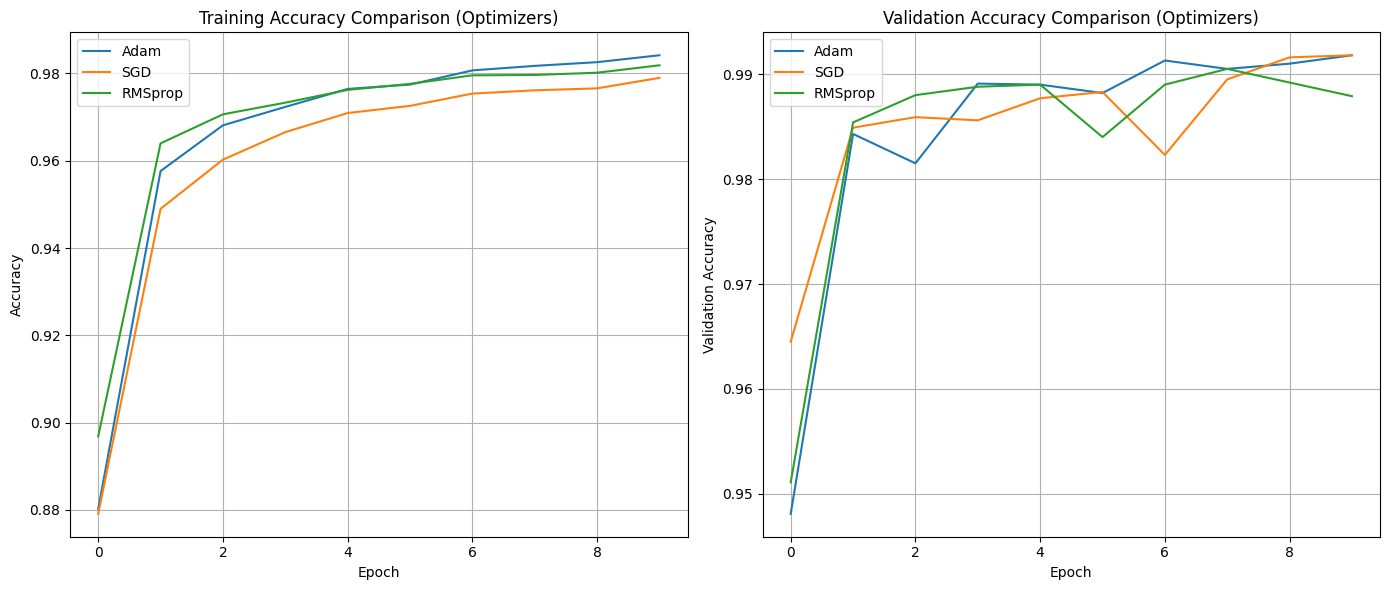

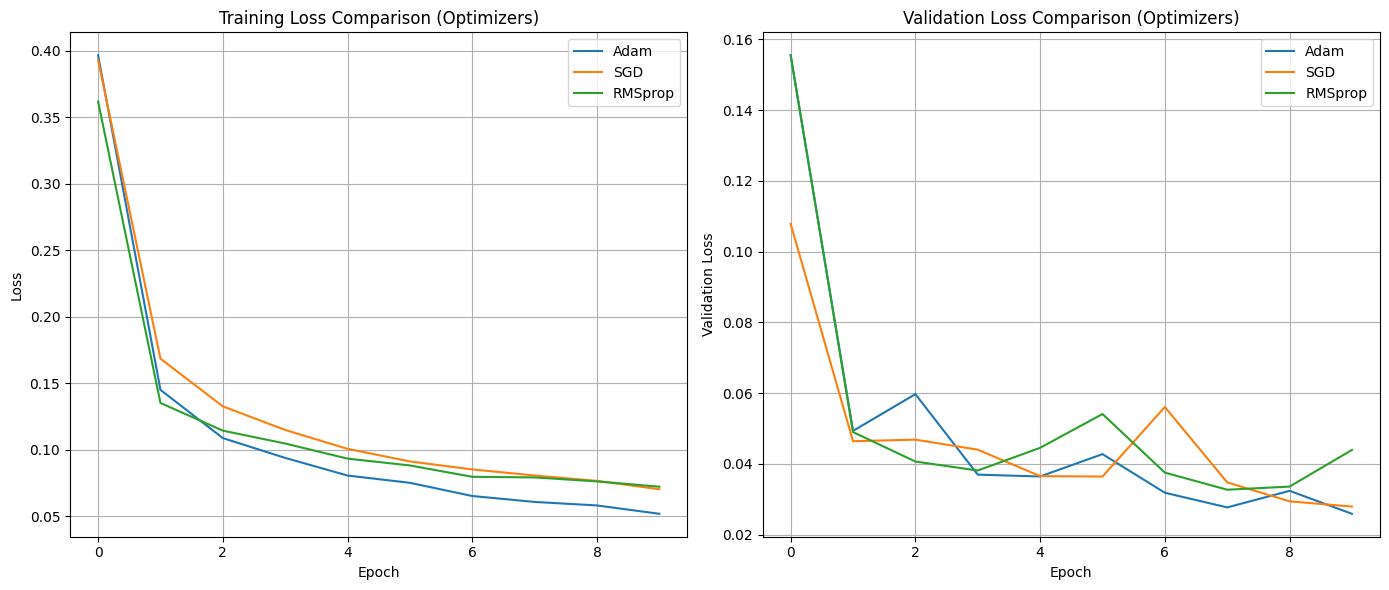

In [30]:
import matplotlib.pyplot as plt

# Plot Training & Validation Accuracy
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1) # Training Accuracy
plt.plot(history_cnn_bn_dropout.history['accuracy'], label='Adam')
plt.plot(history_cnn_bn_dropout_sgd.history['accuracy'], label='SGD')
plt.plot(history_cnn_bn_dropout_rmsprop.history['accuracy'], label='RMSprop')
plt.title('Training Accuracy Comparison (Optimizers)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2) # Validation Accuracy
plt.plot(history_cnn_bn_dropout.history['val_accuracy'], label='Adam')
plt.plot(history_cnn_bn_dropout_sgd.history['val_accuracy'], label='SGD')
plt.plot(history_cnn_bn_dropout_rmsprop.history['val_accuracy'], label='RMSprop')
plt.title('Validation Accuracy Comparison (Optimizers)')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Plot Training & Validation Loss
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1) # Training Loss
plt.plot(history_cnn_bn_dropout.history['loss'], label='Adam')
plt.plot(history_cnn_bn_dropout_sgd.history['loss'], label='SGD')
plt.plot(history_cnn_bn_dropout_rmsprop.history['loss'], label='RMSprop')
plt.title('Training Loss Comparison (Optimizers)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2) # Validation Loss
plt.plot(history_cnn_bn_dropout.history['val_loss'], label='Adam')
plt.plot(history_cnn_bn_dropout_sgd.history['val_loss'], label='SGD')
plt.plot(history_cnn_bn_dropout_rmsprop.history['val_loss'], label='RMSprop')
plt.title('Validation Loss Comparison (Optimizers)')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

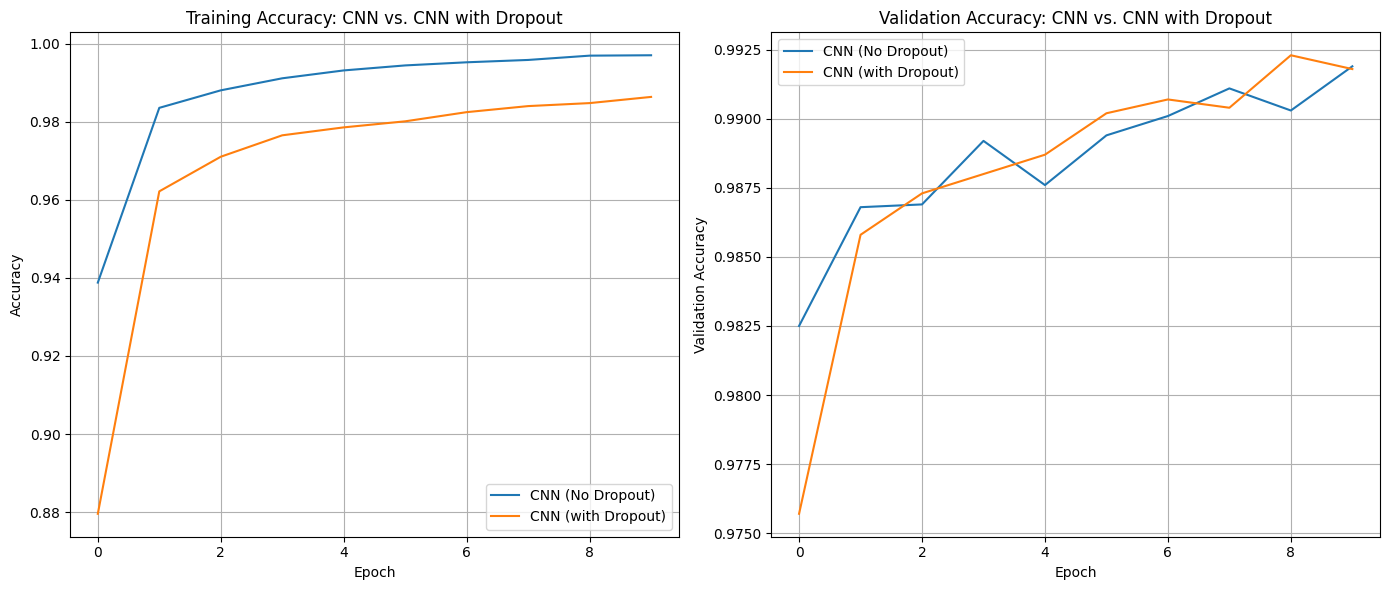

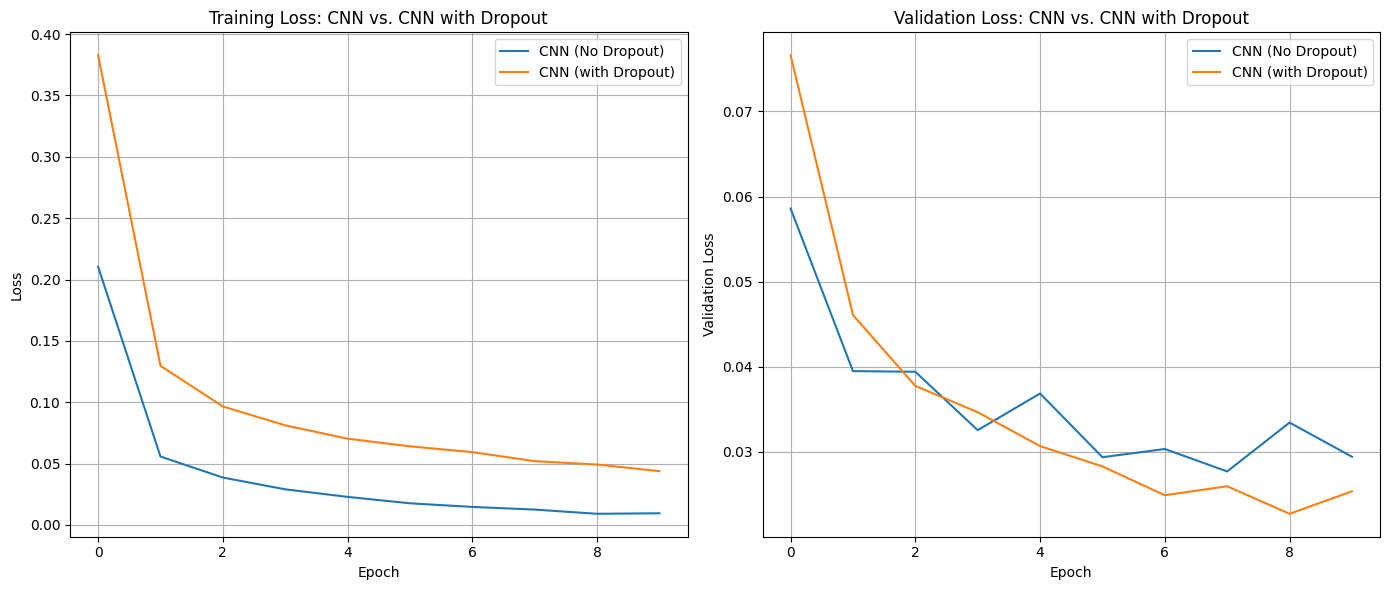

In [32]:
import matplotlib.pyplot as plt

# Plot Training & Validation Accuracy Comparison
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1) # Training Accuracy
plt.plot(history_cnn.history['accuracy'], label='CNN (No Dropout)')
plt.plot(history_cnn_dropout.history['accuracy'], label='CNN (with Dropout)')
plt.title('Training Accuracy: CNN vs. CNN with Dropout')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2) # Validation Accuracy
plt.plot(history_cnn.history['val_accuracy'], label='CNN (No Dropout)')
plt.plot(history_cnn_dropout.history['val_accuracy'], label='CNN (with Dropout)')
plt.title('Validation Accuracy: CNN vs. CNN with Dropout')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Plot Training & Validation Loss Comparison
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1) # Training Loss
plt.plot(history_cnn.history['loss'], label='CNN (No Dropout)')
plt.plot(history_cnn_dropout.history['loss'], label='CNN (with Dropout)')
plt.title('Training Loss: CNN vs. CNN with Dropout')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2) # Validation Loss
plt.plot(history_cnn.history['val_loss'], label='CNN (No Dropout)')
plt.plot(history_cnn_dropout.history['val_loss'], label='CNN (with Dropout)')
plt.title('Validation Loss: CNN vs. CNN with Dropout')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


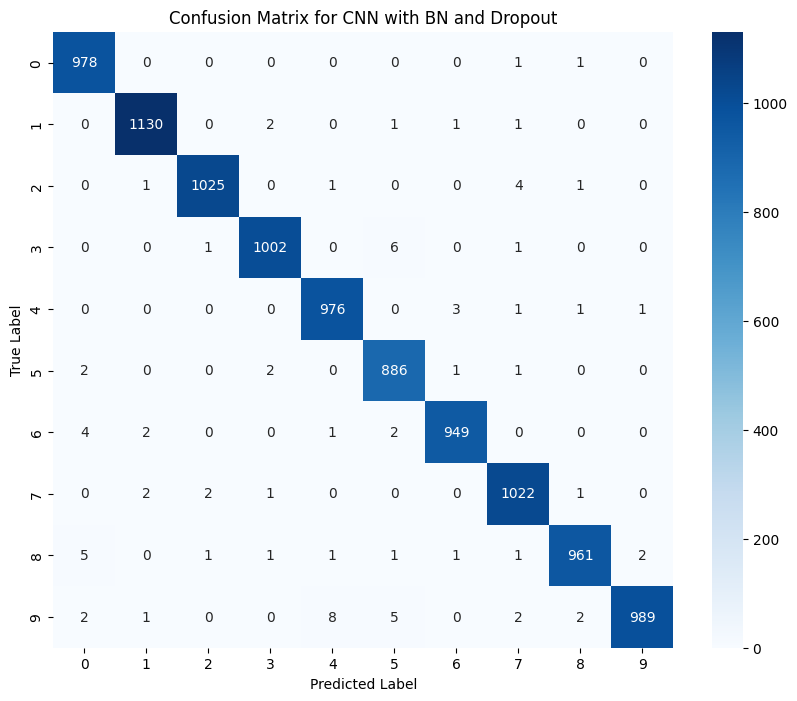

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Get predictions from the best model (cnn_bn_dropout_model)
y_pred_probabilities = cnn_bn_dropout_model.predict(x_test_reshaped)
y_pred_classes = np.argmax(y_pred_probabilities, axis=1)
y_true_classes = np.argmax(y_test_one_hot, axis=1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for CNN with BN and Dropout')
plt.show()